In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import scale

In [8]:
p = 9
n = 50

In [9]:
X = np.random.normal(loc=0, scale=1, size=n*p).reshape(n, p)

In [10]:
beta_true = np.ones(p) / p
sigma = 1
y = X @ beta_true + np.random.normal(0, sigma, n)

X_scaled = scale(X)

In [25]:
lmbd = np.arange(0, 500)
d = np.linalg.svd(X_scaled, compute_uv=False)

df = lambda l, d: (d[:, None]**2 / (d[:, None]**2 + l[None, :])).sum(axis=0)


In [27]:
max_lambda = df(lmbd, d)[df(lmbd, d) >= 1].shape[0]

In [33]:

lambdas = np.linspace(0, max_lambda, 100)

indicies = np.arange(n)
np.random.shuffle(indicies)

K = 10
piece_len = n // K
mse_history = []

for l in lambdas:
    model = Ridge(l)
    mse = 0
    for k in range(K):
        test = indicies[k:k+piece_len]
        train = np.concatenate([indicies[:k,], indicies[k+piece_len:]])
        
        X_full = np.concatenate([X_scaled, np.ones(n)[:, None]], axis=-1)
        model.fit(X_full[train, :], y[train])
        y_hat = model.predict(X_full[test, :])
        
        mse += ((y[test] - y_hat)**2).mean()
    
    mse_history.append(mse)

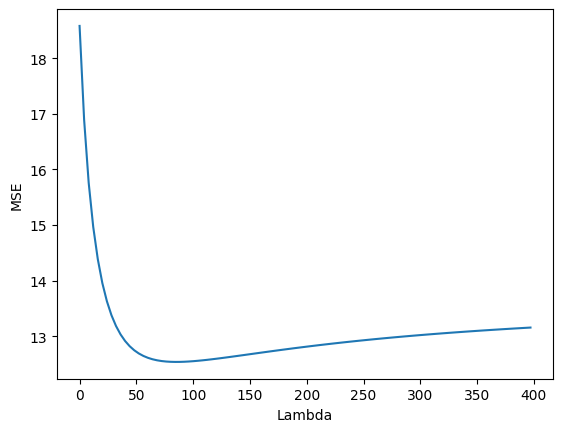

In [34]:
import  matplotlib.pyplot as plt

plt.plot(lambdas, mse_history)
plt.ylabel('MSE')
plt.xlabel('Lambda');

Vismazakais MSE ir pie lambda 

In [37]:
lambdas[np.argmin(mse_history)]

84.21212121212122